<a href="https://colab.research.google.com/github/atpathak/DeepLearning_code-templates_2026/blob/main/SelfOrganizingMap_FraudDetection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


We split the dataset just to seperate the class from the rest, and we know it is unsupervised model, we will use only X when training.

In [23]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [25]:
!pip install MiniSom

Training the SOM

In [26]:
from minisom import MiniSom

In [27]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration=100)

In [28]:
from pylab import bone, pcolor, colorbar, plot, show


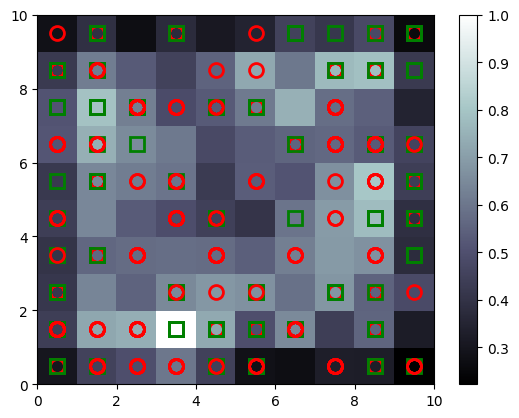

In [29]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

In [38]:
mappings = som.win_map(X)

In [39]:
frauds =  np.concatenate((mappings[(3, 1)], mappings[(8, 8)]), axis = 0)

In [41]:
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5810723e+07, 1.0000000e+00, 3.8170000e+01, 1.0125000e+01,
        2.0000000e+00, 1.4000000e+01, 4.0000000e+00, 2.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 5.2000000e+02, 1.9700000e+02],
       [1.5766663e+07, 1.0000000e+00, 5.3920000e+01, 9.6250000e+00,
        2.0000000e+00, 1.0000000e+01, 4.0000000e+00, 8.6650000e+00,
        1.0000000e+00, 1.0000000e+00, 5.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5703177e+07, 1.0000000e+00, 3.0170000e+01, 6.5000000e+00,
        2.0000000e+00, 1.3000000e+01, 4.0000000e+00, 3.1250000e+00,
        1.0000000e+00, 1.0000000e+00, 8.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 3.3000000e+02, 1.2010000e+03],
       [1.5733602e+07, 1.0000000e+00, 2.1830000e+01, 1.1000000e+01,
        2.0000000e+00, 1.4000000e+01, 4.0000000e+00, 2.9000000e-01,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00,